In [166]:
import pandas as pd
import numpy as np
from statsmodels.graphics.gofplots import qqplot

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder



In [253]:
# Load the processed data set of the cleveland database
DF_1 = pd.read_csv("C:/Temp/AIFiles/processed.cleveland.csv", names = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang', 
              'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [133]:
# summerise  top and bottom part of the data set and check total counts are matching with original data
DF_1

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [134]:
print(DF_1.head())

    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca thal  num  
0    3.0  0.0  6.0    0  
1    2.0  3.0  3.0    2  
2    2.0  2.0  7.0    1  
3    3.0  0.0  3.0    0  
4    1.0  0.0  3.0    0  


In [263]:
# Check for missing values
print(DF_1.isnull().sum())

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
num         0
dtype: int64


In [270]:
DF_1 = DF_1.drop_duplicates()

DF_1 = DF_1.fillna(DF_1.mean())

DF_1

C:\Users\sajiths\AppData\Local\Temp\ipykernel_34312\3063758624.py:3: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  DF_1 = DF_1.fillna(DF_1.mean())


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,0.0,7.0,1
299,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,2.0,7.0,2
300,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0,7.0,3
301,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0,3.0,1


In [265]:
DF_1.isnull().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
num         False
dtype: bool

In [255]:
# Compute summary statistics for each column
print(DF_1.describe())

              age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.438944    0.679868    3.158416  131.689769  246.693069    0.148515   
std      9.038662    0.467299    0.960126   17.599748   51.776918    0.356198   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  211.000000    0.000000   
50%     56.000000    1.000000    3.000000  130.000000  241.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  275.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope         num  
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000  
mean     0.990099  149.607261    0.326733    1.039604    1.600660    0.937294  
std      0.994971   22.875003 

In [137]:
DF_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    float64
 1   sex       303 non-null    float64
 2   cp        303 non-null    float64
 3   trestbps  303 non-null    float64
 4   chol      303 non-null    float64
 5   fbs       303 non-null    float64
 6   restecg   303 non-null    float64
 7   thalach   303 non-null    float64
 8   exang     303 non-null    float64
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    float64
 11  ca        303 non-null    object 
 12  thal      303 non-null    object 
 13  num       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [138]:
CATEGORICAL_COLS = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal', 'ca']
NUMERICAL_COLS = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']


C_DF = DF_1[CATEGORICAL_COLS]
N_DF = DF_1[NUMERICAL_COLS]

heart_cat.nunique()

sex        2
cp         4
fbs        2
restecg    3
exang      2
slope      3
thal       4
ca         5
dtype: int64

In [181]:
# --- Descriptive Statistics ---
N_DF.select_dtypes(exclude='object').describe().T.style.background_gradient(cmap='PuRd').set_properties(**{'font-family': 'Segoe UI'})

,count,mean,std,min,25%,50%,75%,max
age,303.000000,54.438944,9.038662,29.000000,48.000000,56.000000,61.000000,77.000000
trestbps,303.000000,131.689769,17.599748,94.000000,120.000000,130.000000,140.000000,200.000000
chol,303.000000,246.693069,51.776918,126.000000,211.000000,241.000000,275.000000,564.000000
thalach,303.000000,149.607261,22.875003,71.000000,133.500000,153.000000,166.000000,202.000000
oldpeak,303.000000,1.039604,1.161075,0.000000,0.000000,0.800000,1.600000,6.200000


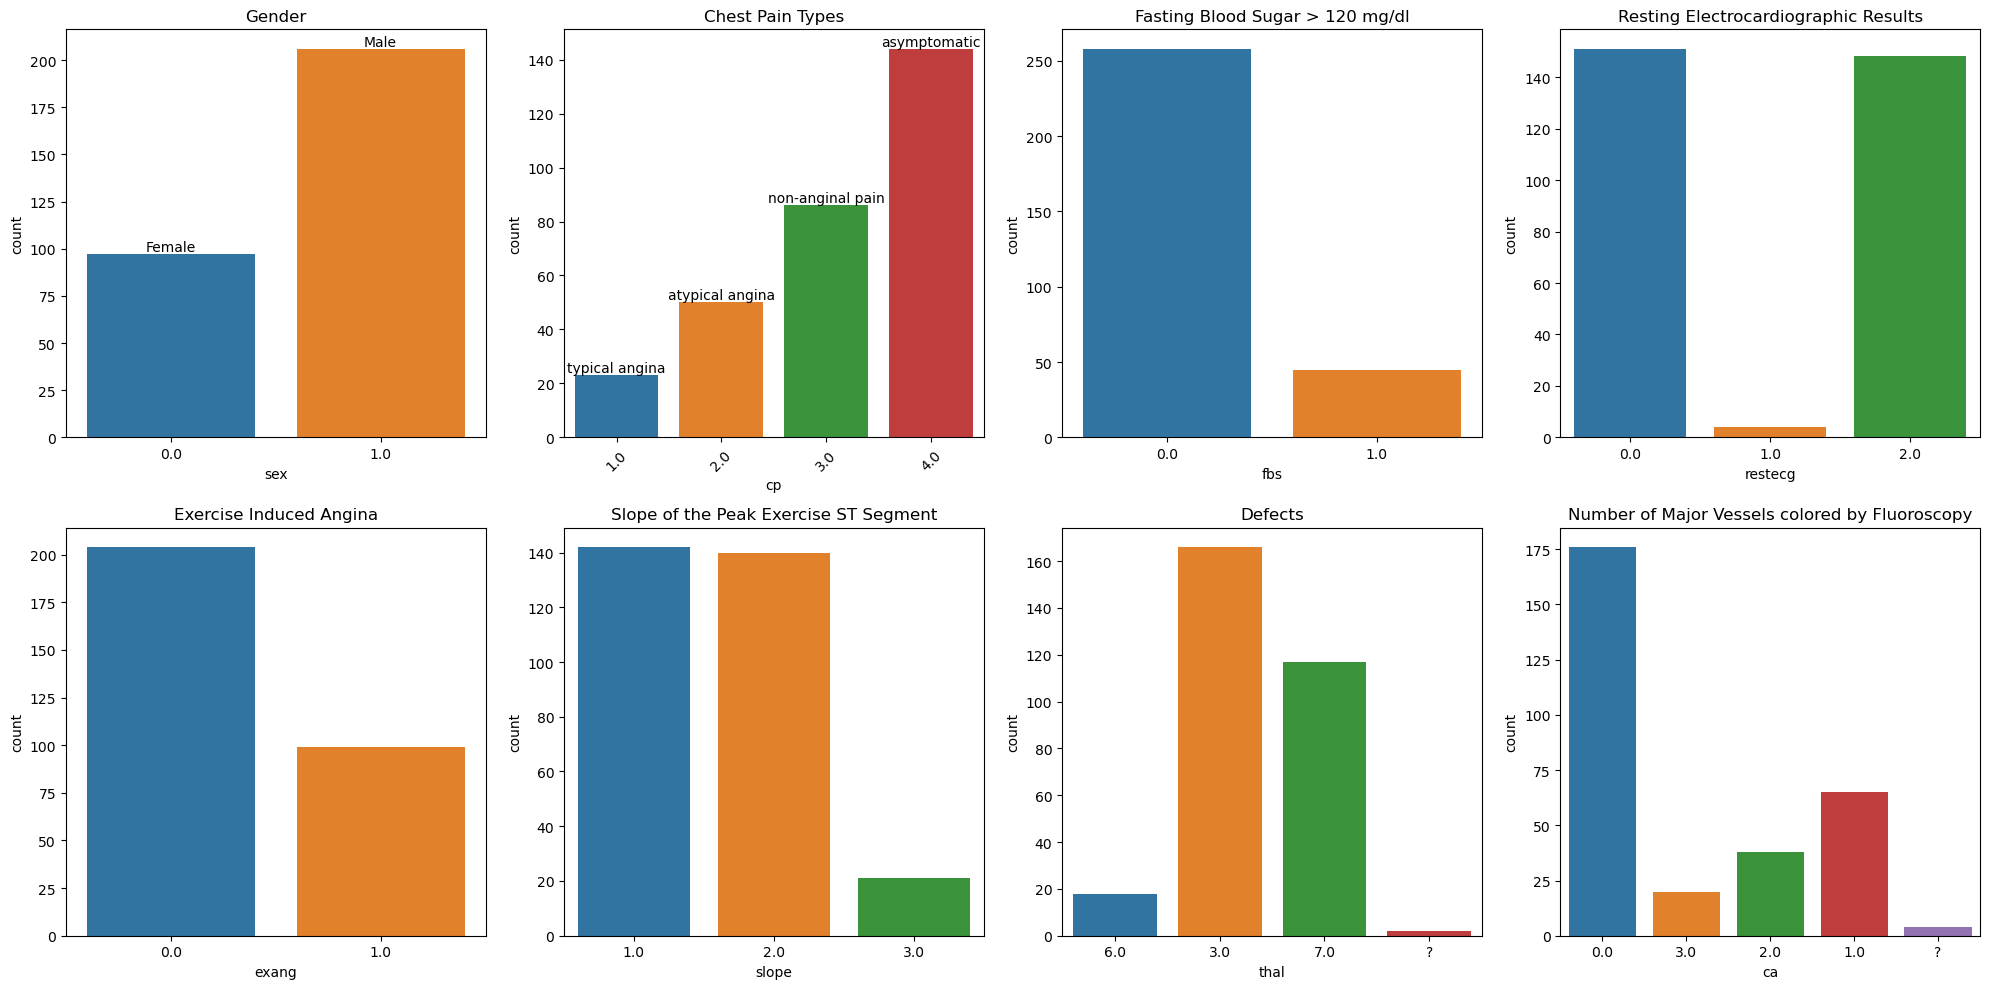

In [139]:
fig, axes = plt.subplots(2, 4, figsize=(20,10))

ax = sns.countplot(x='sex', data=C_DF, ax=axes[0,0])
labels=['Female', 'Male']
axes[0,0].set_title('Gender')
ax.bar_label(container=ax.containers[0], labels=labels)

ax = sns.countplot(x='cp', data=C_DF, ax=axes[0,1])
labels=['typical angina','atypical angina', 'non-anginal pain', 'asymptomatic' ]
axes[0,1].tick_params(axis='x', rotation=45)
axes[0,1].set_title('Chest Pain Types')
ax.bar_label(container=ax.containers[0], labels=labels)

sns.countplot(x='fbs', data=C_DF, ax=axes[0,2])
axes[0,2].set_title('Fasting Blood Sugar > 120 mg/dl')

sns.countplot(x='restecg', data=C_DF, ax=axes[0,3])
axes[0,3].set_title('Resting Electrocardiographic Results')

sns.countplot(x='exang', data=C_DF, ax=axes[1,0])
axes[1,0].set_title('Exercise Induced Angina')

sns.countplot(x='slope', data=C_DF, ax=axes[1,1])
axes[1,1].set_title('Slope of the Peak Exercise ST Segment')

sns.countplot(x='thal', data=C_DF, ax=axes[1,2])
axes[1,2].set_title('Defects')

sns.countplot(x='ca', data=C_DF, ax=axes[1,3])
axes[1,3].set_title('Number of Major Vessels colored by Fluoroscopy')
plt.tight_layout()
plt.show()

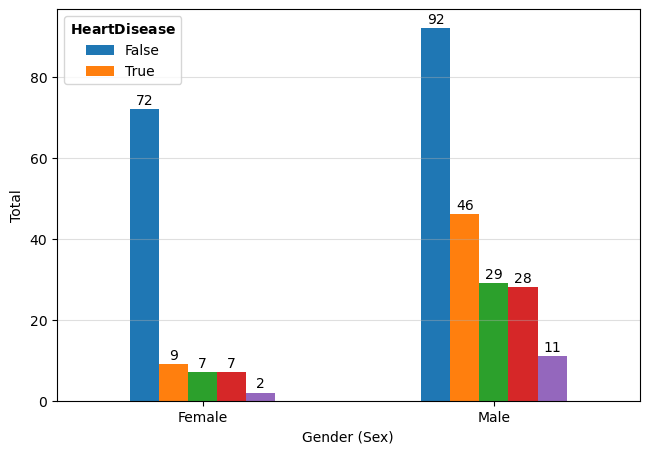

In [174]:
# --- Labels Settings ---
labels = ['False', 'True']
label_gender = np.array([0, 1])
label_gender2 = ['Female', 'Male']

# --- Creating Bar Chart ---
ax = pd.crosstab(DF_1.sex, DF_1.num).plot(kind='bar')
# --- Bar Chart Settings ---
for rect in ax.patches:
    ax.text (rect.get_x()+rect.get_width()/2, 
             rect.get_height()+1.25,rect.get_height(), 
             horizontalalignment='center', fontsize=10)

plt.tight_layout(rect=[0, 0.04, 1, 1.025])
plt.xlabel('Gender (Sex)')
plt.ylabel('Total')
plt.xticks(label_gender, label_gender2, rotation=0)
plt.grid(axis='y', alpha=0.4)
plt.grid(axis='x', alpha=0)
plt.legend(labels=labels, title='$\\bf{Heart Disease}$', loc='upper left', frameon=True);

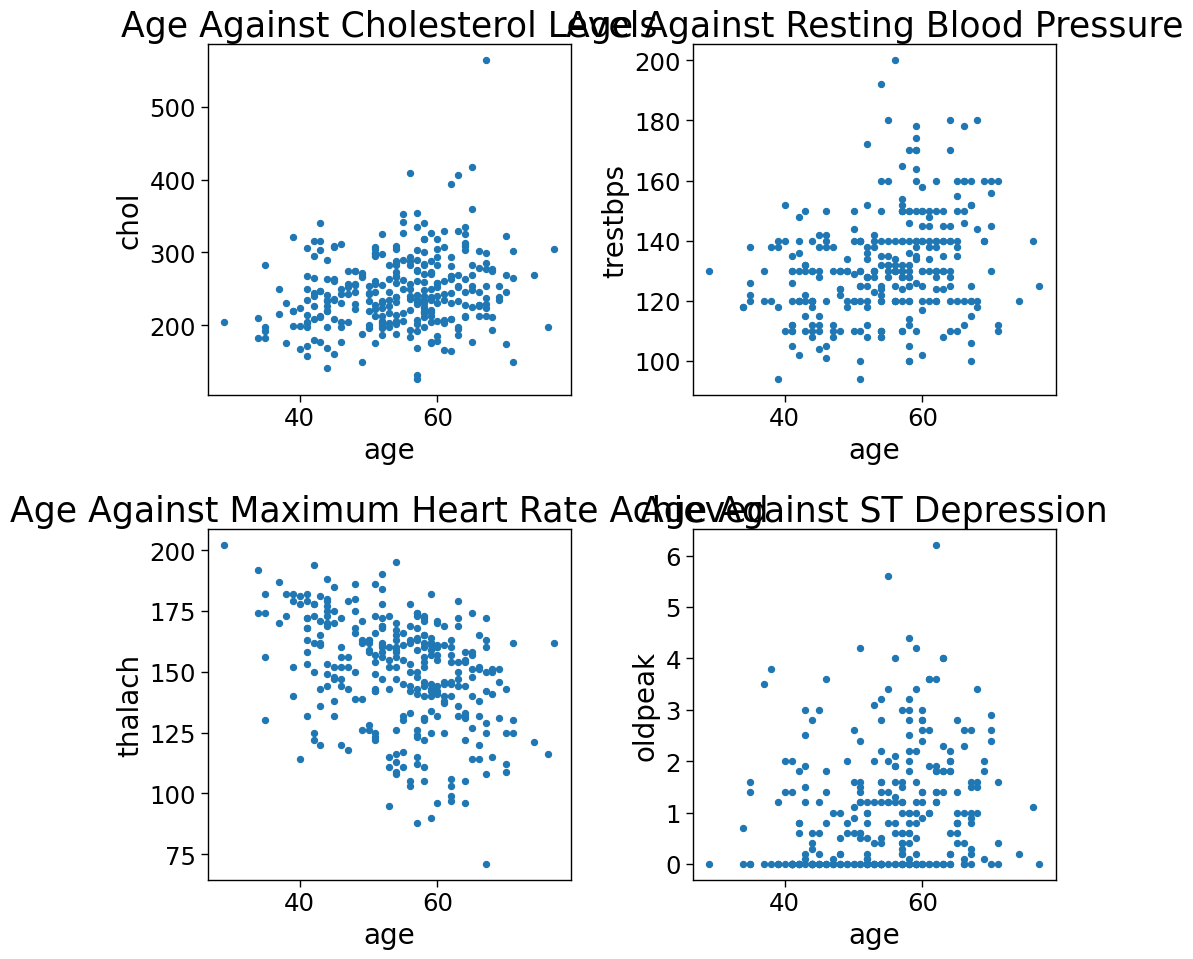

In [256]:
# Use scatterplots to visualize key relationships in numerical data
fig, axes = plt.subplots(2, 2, figsize=(10,10))

heart_num.plot('age', 'chol', kind='scatter', ax=axes[0,0])
axes[0,0].set_title('Age Against Cholesterol Levels')

heart_num.plot('age', 'trestbps', kind='scatter', ax=axes[0,1])
axes[0,1].set_title('Age Against Resting Blood Pressure')

heart_num.plot('age', 'thalach', kind='scatter', ax=axes[1,0])
axes[1,0].set_title('Age Against Maximum Heart Rate Achieved')

heart_num.plot('age', 'oldpeak', kind='scatter', ax=axes[1,1])
axes[1,1].set_title('Age Against ST Depression')

plt.tight_layout()
plt.show()

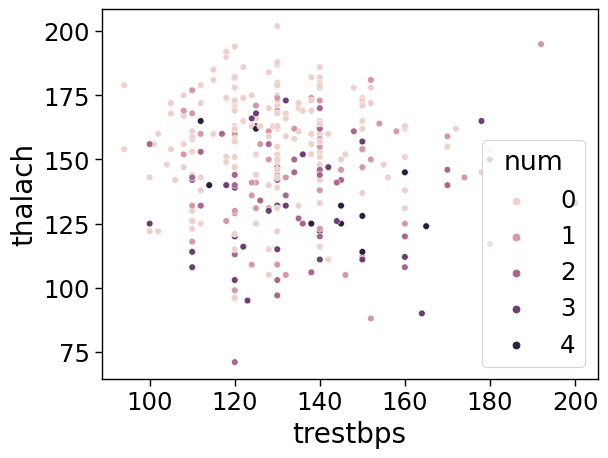

In [257]:
sns.scatterplot(x='trestbps', y='thalach', hue='num', data=DF_1)


#sns.scatterplot(x='chol', y='thalach', hue='sex', data=DF_1, ax=axes[1])

#sns.scatterplot(x='chol', y='thalach', hue='restecg', data=DF_1, ax=axes[2])
plt.show()

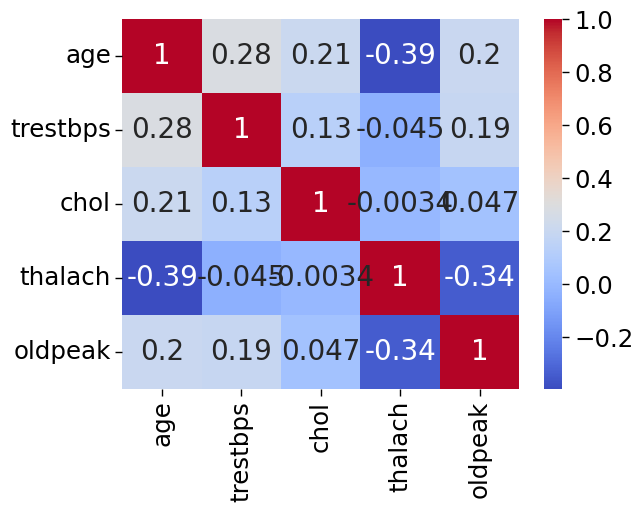

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = heart_num.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

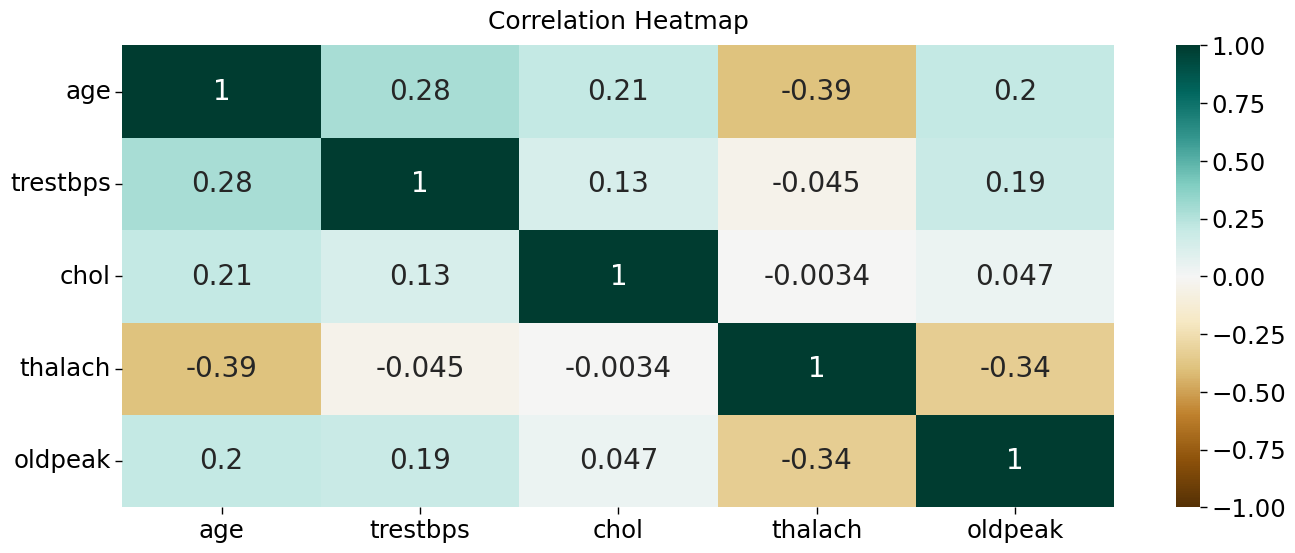

In [259]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(N_DF.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
# save heatmap as .png file
# dpi - sets the resolution of the saved image in dots/inches
# bbox_inches - when set to 'tight' - does not allow the labels to be cropped
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')



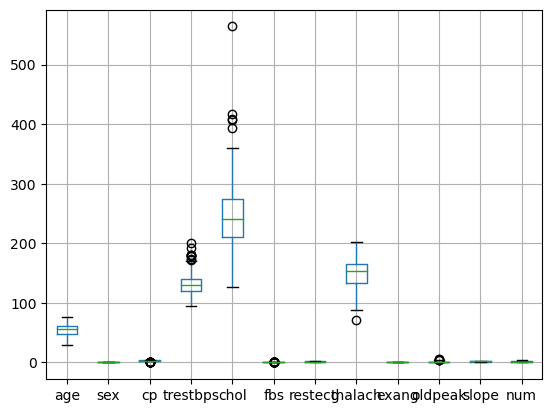

In [150]:
# Display boxplot to visualize outliers in the data

DF_1.boxplot()
plt.show()

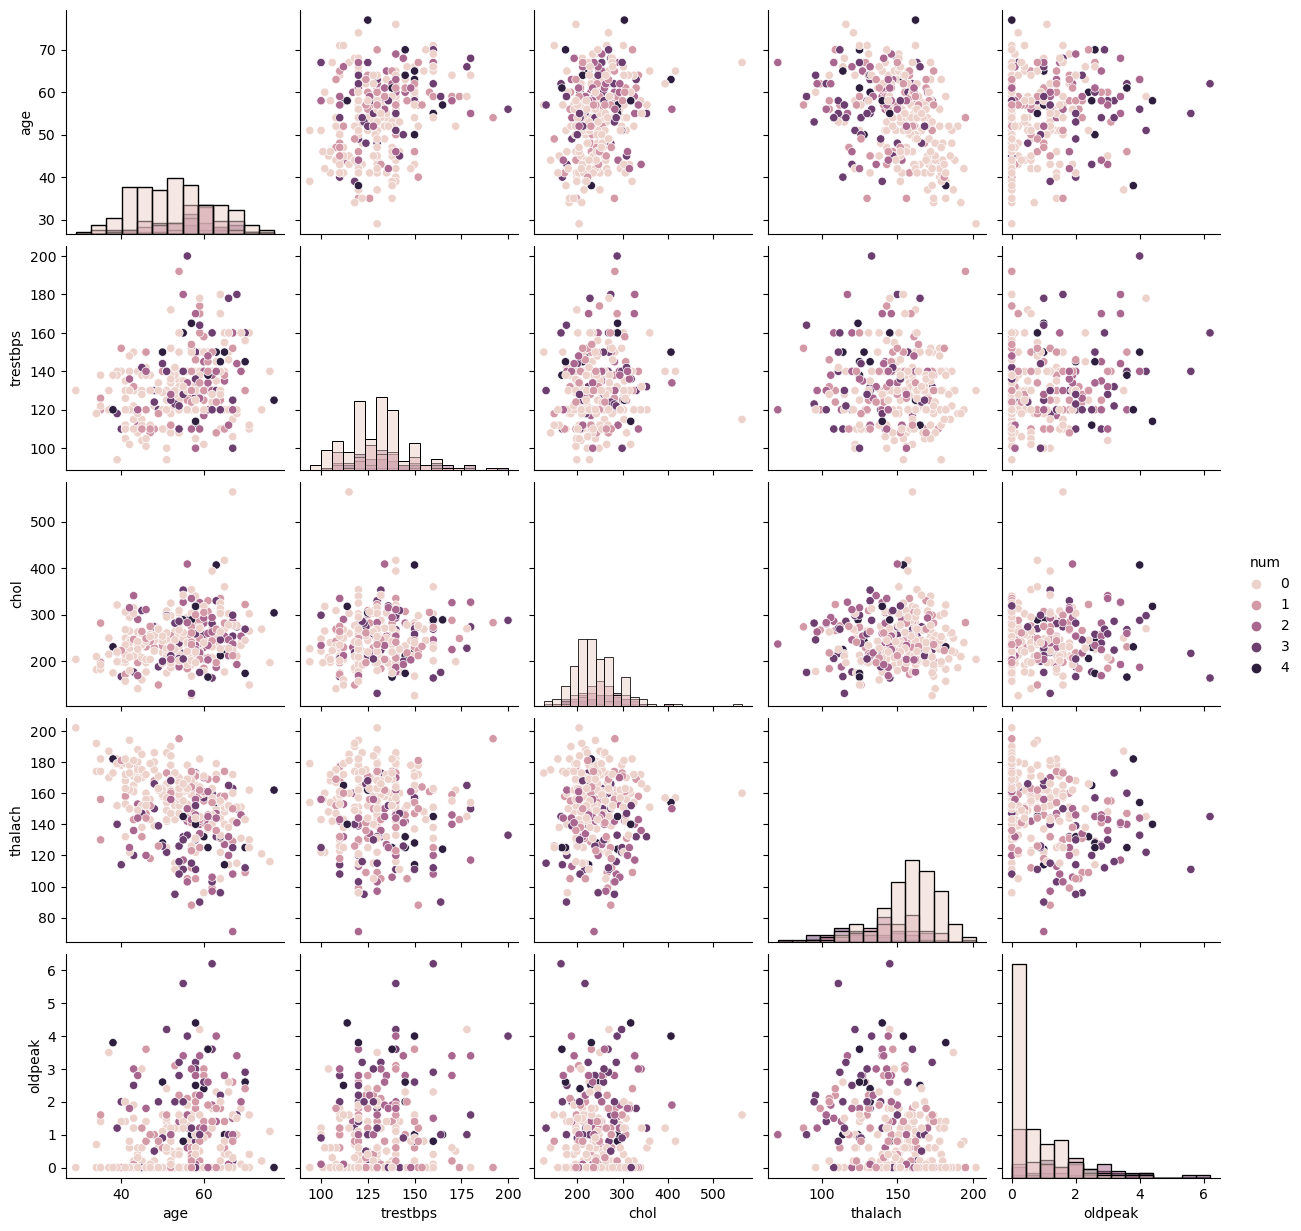

In [151]:
sns.pairplot(data=DF_1, vars=  ['age', 'trestbps', 'chol', 'thalach', 'oldpeak'], hue="num" , diag_kind="hist" )

.: Age Column Skewness & Kurtosis :.
****************************************
Skewness: -0.209
Kurtosis: -0.523




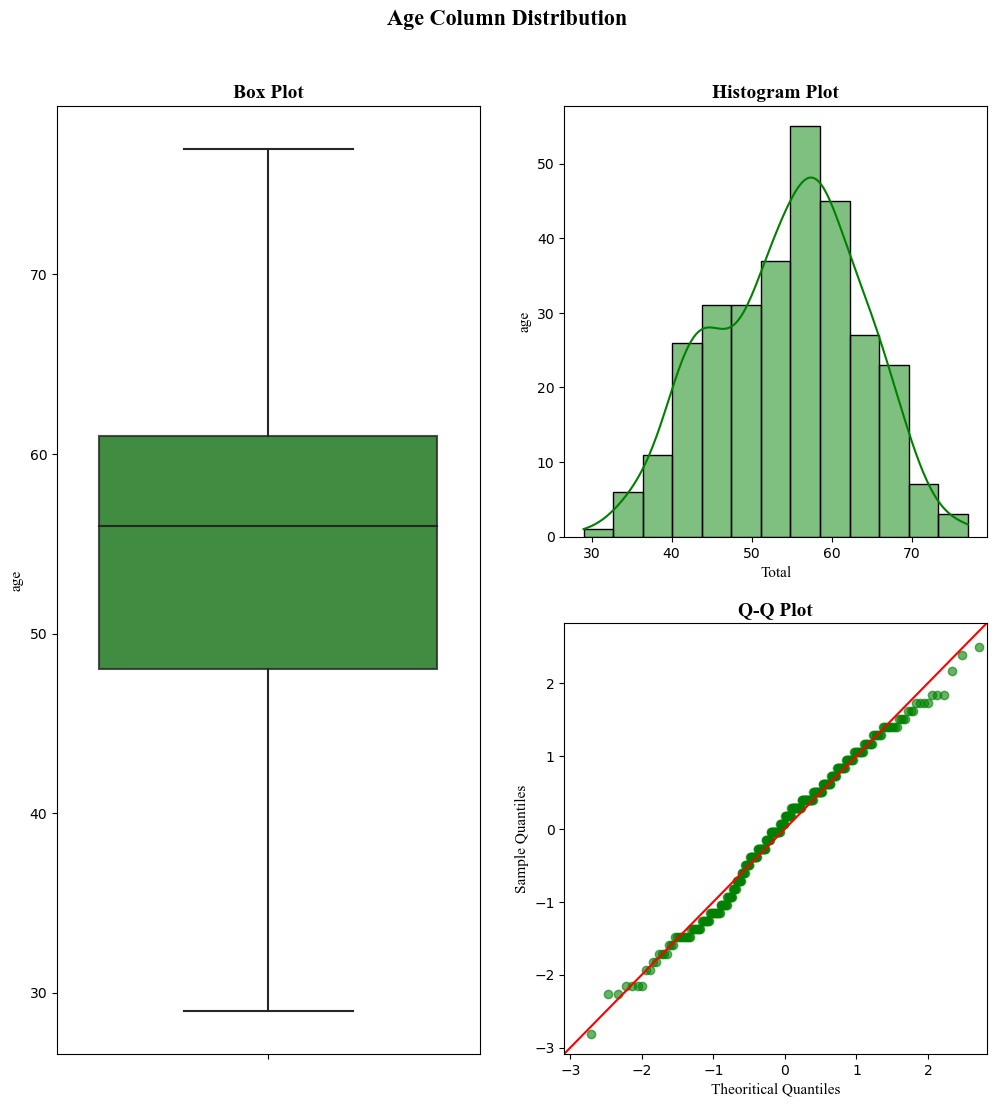

In [193]:
# --- Variable, Color & Plot Size ---
var = 'age'
color = 'green'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Age Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(DF_1[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(DF_1[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Age Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color='black')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
sns.histplot(data=DF_1, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
qqplot(DF_1[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color='black')
sns.boxplot(data=DF_1, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('age', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

plt.show()

.: Cholestoral Column Skewness & Kurtosis :.
****************************************
Skewness: 1.136
Kurtosis: 4.492




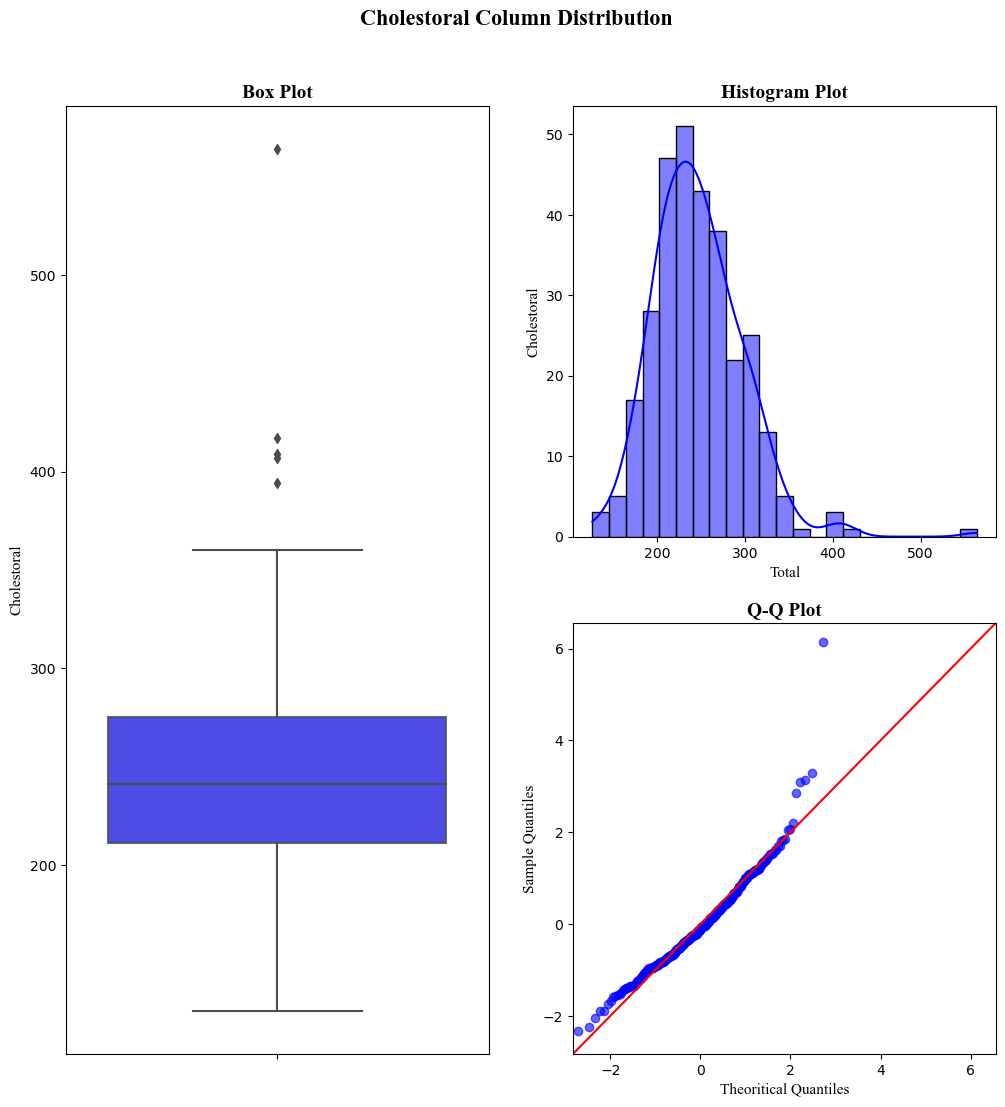

In [176]:
# --- Variable, Color & Plot Size ---
var = 'chol'
color = 'blue'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Cholestoral Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(DF_1[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(DF_1[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Cholestoral Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color='black')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
sns.histplot(data=DF_1, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('Cholestoral', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
qqplot(DF_1[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color='black')
sns.boxplot(data=DF_1, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Cholestoral', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

plt.show()

.: Resting blood pressure  Column Skewness & Kurtosis :.
****************************************
Skewness: 0.706
Kurtosis: 0.880




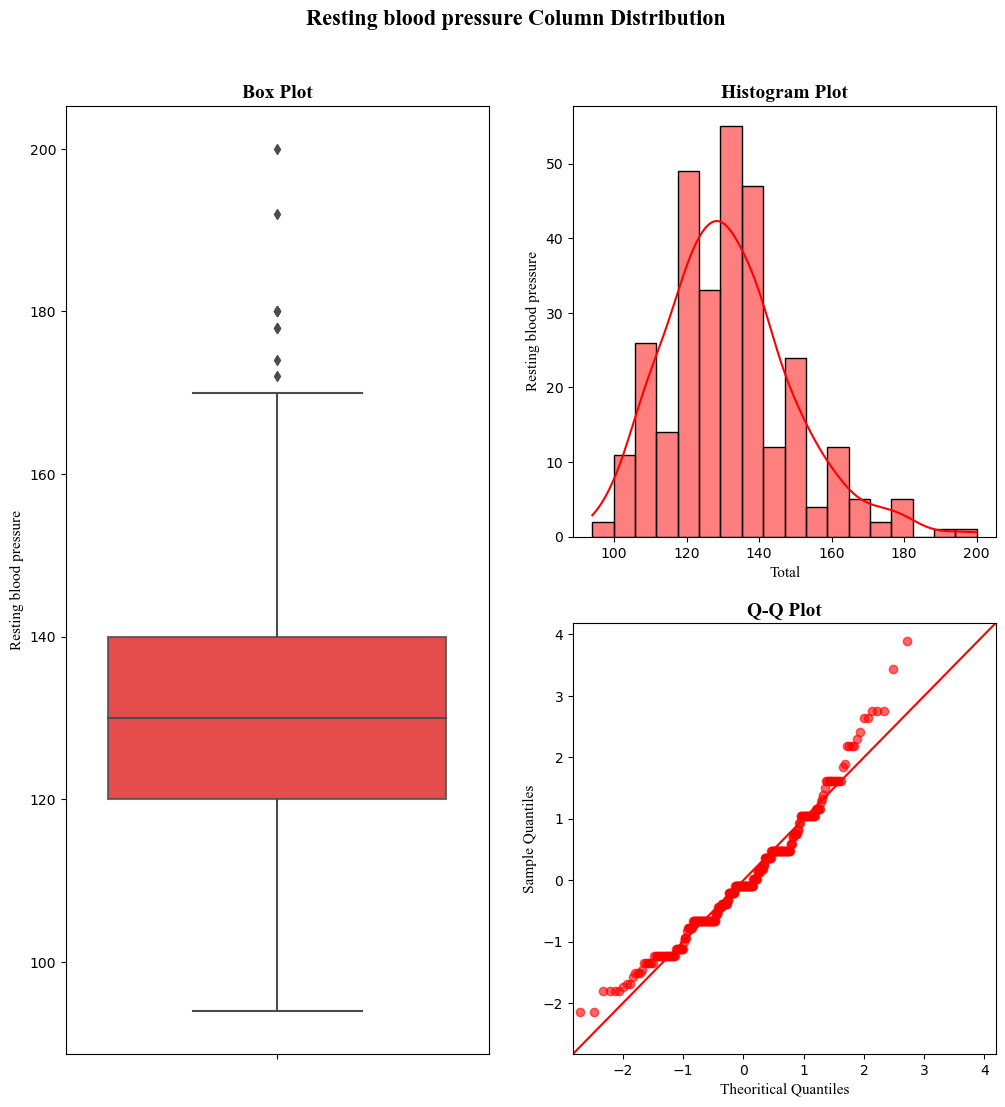

In [189]:
# --- Variable, Color & Plot Size ---
var = 'trestbps'
color = 'red'
fig=plt.figure(figsize=(12, 12))

# --- Skewness & Kurtosis ---
print('\033[1m'+'.: Resting blood pressure  Column Skewness & Kurtosis :.'+'\033[0m')
print('*' * 40)
print('Skewness:'+'\033[1m {:.3f}'.format(DF_1[var].skew(axis = 0, skipna = True)))
print('\033[0m'+'Kurtosis:'+'\033[1m {:.3f}'.format(DF_1[var].kurt(axis = 0, skipna = True)))
print('\n')

# --- General Title ---
fig.suptitle('Resting blood pressure Column Distribution', fontweight='bold', fontsize=16, 
             fontfamily='times new roman', color='black')
fig.subplots_adjust(top=0.9)

# --- Histogram ---
ax_1=fig.add_subplot(2, 2, 2)
plt.title('Histogram Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
sns.histplot(data=DF_1, x=var, kde=True, color=color)
plt.xlabel('Total', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('Resting blood pressure', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

# --- Q-Q Plot ---
ax_2=fig.add_subplot(2, 2, 4)
plt.title('Q-Q Plot', fontweight='bold', fontsize=14, 
          fontfamily='times new roman', color='black')
qqplot(DF_1[var], fit=True, line='45', ax=ax_2, markerfacecolor=color, 
       markeredgecolor=color, alpha=0.6)
plt.xlabel('Theoritical Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')
plt.ylabel('Sample Quantiles', fontweight='regular', fontsize=11, 
           fontfamily='times new roman', color='black')

# --- Box Plot ---
ax_3=fig.add_subplot(1, 2, 1)
plt.title('Box Plot', fontweight='bold', fontsize=14, fontfamily='times new roman', 
          color='black')
sns.boxplot(data=DF_1, y=var, color=color, boxprops=dict(alpha=0.8), linewidth=1.5)
plt.ylabel('Resting blood pressure', fontweight='regular', fontsize=11, fontfamily='times new roman', 
           color='black')

plt.show()

In [187]:
DF_1.groupby("sex").mean()

C:\Users\sajiths\AppData\Local\Temp\ipykernel_34312\974471422.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_1.groupby("sex").mean()


,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
sex,,,,,,,,,,,
0.0,55.721649,3.144330,133.340206,261.752577,0.123711,0.958763,151.226804,0.226804,0.867010,1.567010,0.536082
1.0,53.834951,3.165049,130.912621,239.601942,0.160194,1.004854,148.844660,0.373786,1.120874,1.616505,1.126214


In [188]:
DF_1.groupby("cp").mean()

C:\Users\sajiths\AppData\Local\Temp\ipykernel_34312\1337900057.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DF_1.groupby("cp").mean()


,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,num
cp,,,,,,,,,,,
1.0,55.869565,0.826087,140.869565,237.130435,0.217391,1.217391,155.956522,0.173913,1.391304,1.739130,0.478261
2.0,51.360000,0.640000,128.400000,244.780000,0.100000,0.760000,162.420000,0.080000,0.316000,1.320000,0.280000
3.0,53.697674,0.593023,130.290698,243.965116,0.197674,0.848837,155.406977,0.127907,0.806977,1.500000,0.383721
4.0,55.722222,0.722222,132.201389,250.513889,0.125000,1.118056,140.680556,0.555556,1.373611,1.736111,1.569444


In [245]:
# One hot encode the categorical variables and split the target and independent variables
heart_onehot = pd.get_dummies(DF_1, columns=['sex','cp', 'fbs', 'restecg', 'exang'])

X = heart_onehot.drop('num', axis=1)
y = heart_onehot.num

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train.value_counts()

0    135
1     43
3     28
2     27
4      9
Name: num, dtype: int64

In [272]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the data



X = DF_1.drop("num",axis=1)
y = DF_1["num"]
X = pd.get_dummies(X, drop_first=True)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Create the logistic regression model
model = LogisticRegression()

# Train the model on the training data
model.fit(X_train, y_train)

# Predict the target variable on the testing data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model on the testing data
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy: ", accuracy)




Accuracy:  0.5737704918032787


C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [262]:
X = DF_1.drop("num",axis=1)
y = DF_1["num"]
X = pd.get_dummies(X, drop_first=True)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred, y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
print('Accuracy for training set for Logistic Regression = {}'.format((cm_train[0][0] + cm_train[1][1])/len(y_train)))
print('Accuracy for test set for Logistic Regression = {}'.format((cm_test[0][0] + cm_test[1][1])/len(y_test)))


Accuracy for training set for Logistic Regression = 0.5330578512396694
Accuracy for test set for Logistic Regression = 0.5737704918032787


C:\Users\sajiths\AppData\Local\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
